In [295]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [367]:
# importing the dataset
df=pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [297]:
df.sample(20)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
352,353,303,100,2,3.0,3.5,8.06,1,0.64
436,437,310,110,1,1.5,4.0,7.23,1,0.58
6,7,321,109,3,3.0,4.0,8.20,1,0.75
333,334,319,108,3,3.0,3.5,8.54,1,0.71
200,201,317,103,3,2.5,3.0,8.54,1,0.73
312,313,311,107,4,4.5,4.5,9.00,1,0.78
415,416,327,106,4,4.0,4.5,8.75,1,0.76
362,363,338,115,5,4.5,5.0,9.23,1,0.91
221,222,316,110,3,3.5,4.0,8.56,0,0.75
98,99,332,119,4,5.0,4.5,9.24,1,0.90


In [368]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [373]:
df.duplicated().sum()

0

In [299]:
#checking for null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [23]:
df=df.drop(["Serial No."],axis=1)
#dropping serial no because it has no relation with the output feature

In [300]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [25]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot: >

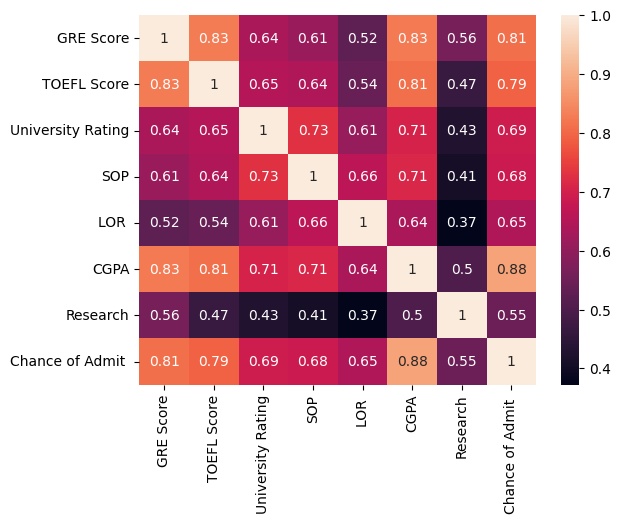

In [9]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
# From the above analysis every feature contributes to chances of admit, and chances of admit is highly correlated with CGPA.

In [26]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [27]:
df.columns=df.columns.str.strip()

In [28]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

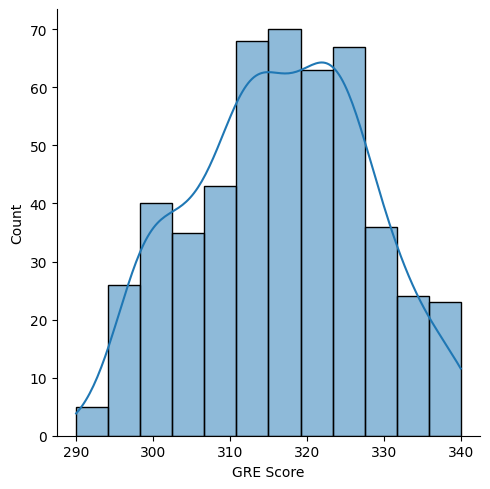

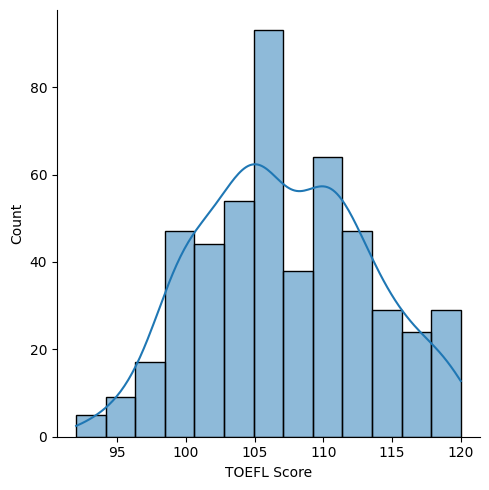

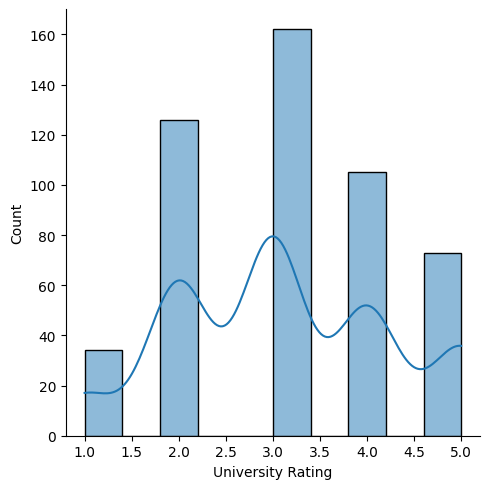

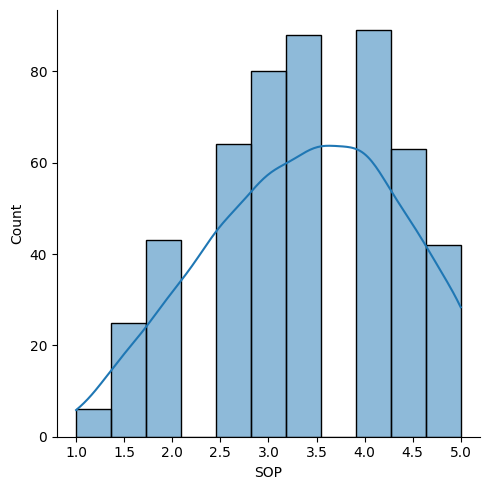

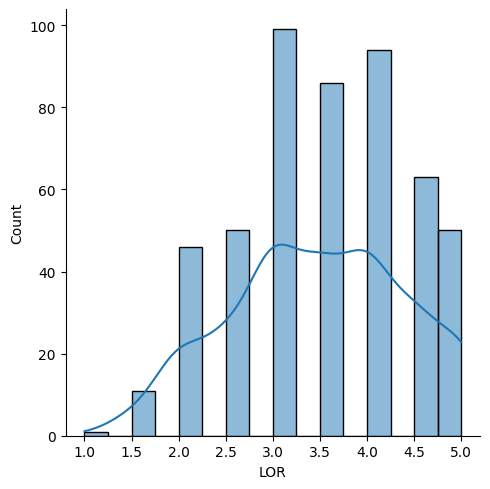

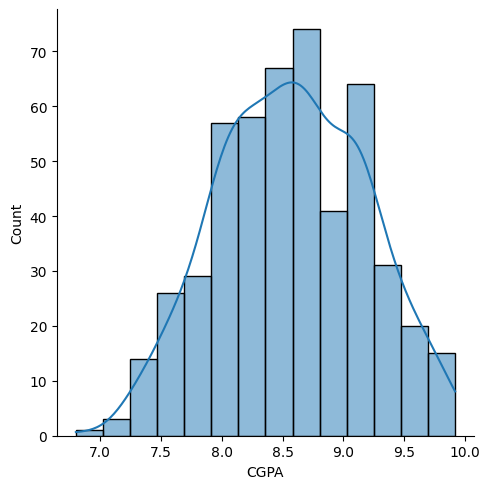

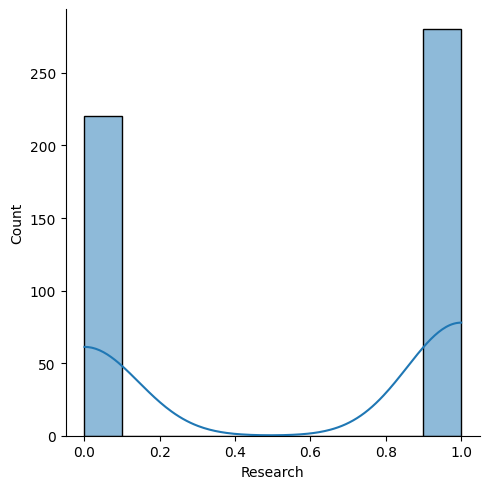

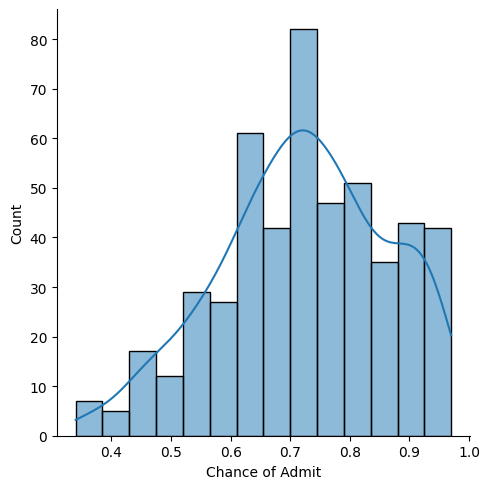

In [29]:
for i in df.columns:
    sns.displot(df[i],kde=True)

In [54]:
df['University Rating'].skew()
#checking for skewness

0.09029498312712977

In [30]:
sns.lineplot

<function seaborn.relational.lineplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, orient='x', sort=True, err_style='band', err_kws=None, legend='auto', ci='deprecated', ax=None, **kwargs)>

<AxesSubplot: xlabel='GRE Score', ylabel='Chance of Admit'>

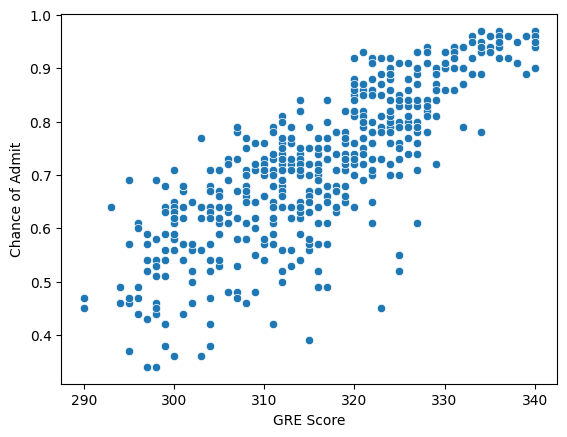

In [31]:
sns.scatterplot(x=df["GRE Score"],y=df["Chance of Admit"])

<AxesSubplot: xlabel='TOEFL Score', ylabel='Chance of Admit'>

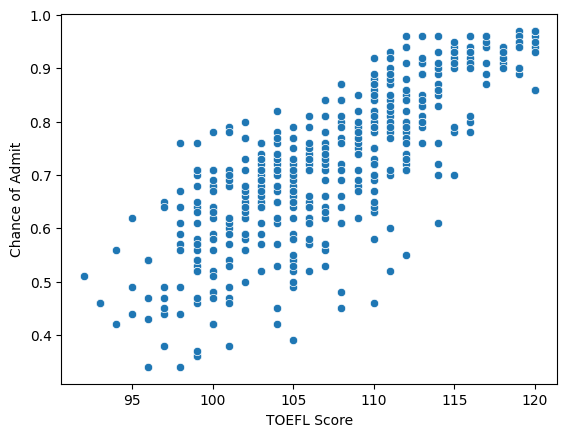

In [32]:
sns.scatterplot(x=df["TOEFL Score"],y=df["Chance of Admit"])

<AxesSubplot: xlabel='University Rating', ylabel='Chance of Admit'>

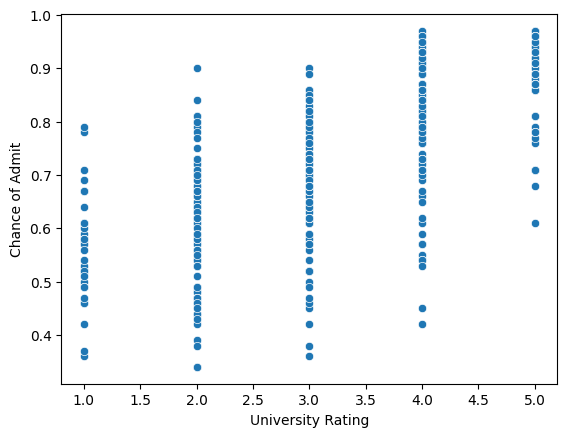

In [38]:
sns.scatterplot(x=df["University Rating"],y=df["Chance of Admit"])

<AxesSubplot: xlabel='SOP', ylabel='Chance of Admit'>

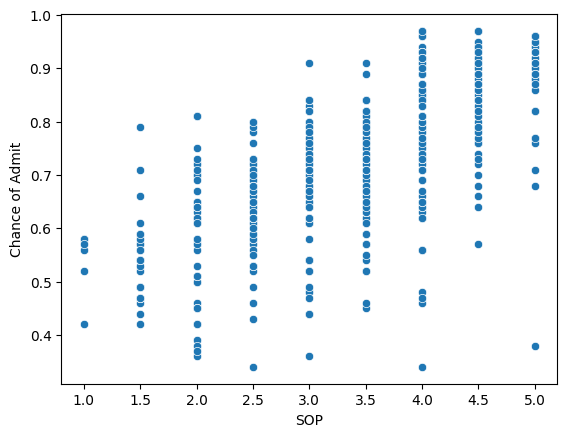

In [39]:
sns.scatterplot(x=df["SOP"],y=df["Chance of Admit"])

<AxesSubplot: xlabel='CGPA', ylabel='Chance of Admit'>

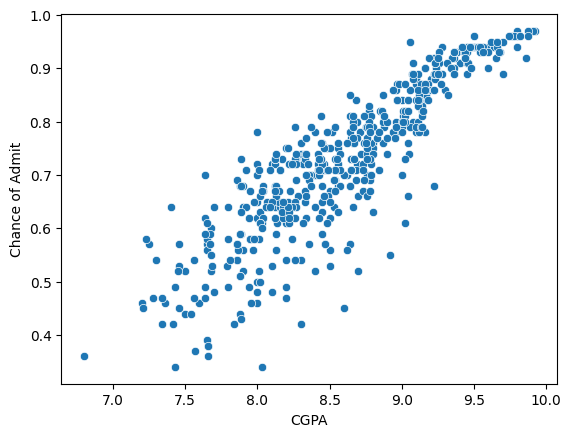

In [40]:
sns.scatterplot(x=df["CGPA"],y=df["Chance of Admit"])

<AxesSubplot: xlabel='Research', ylabel='Chance of Admit'>

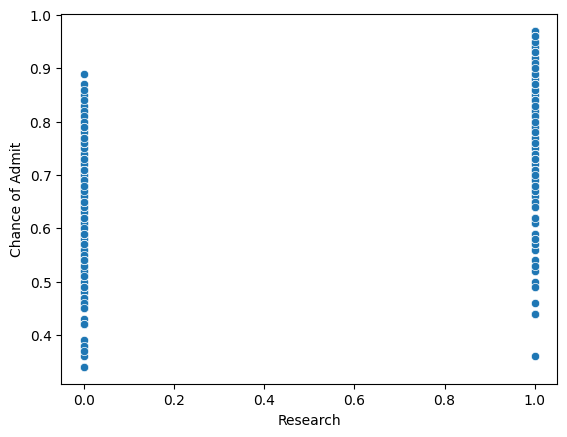

In [41]:
sns.scatterplot(x=df["Research"],y=df["Chance of Admit"])

In [58]:
#applying Min Max scaler Transformation after test train split.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop("Chance of Admit",axis=1),df["Chance of Admit"],test_size=0.25)


In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [60]:
X_train_scaled=scaler.fit_transform(X_train)

In [61]:
X_test_scaled=scaler.transform(X_test)

In [62]:
X_train_scaled

array([[0.25531915, 0.35714286, 0.25      , ..., 0.375     , 0.27009646,
        0.        ],
       [0.4893617 , 0.46428571, 0.25      , ..., 0.375     , 0.45016077,
        1.        ],
       [0.53191489, 0.60714286, 0.        , ..., 0.625     , 0.74598071,
        0.        ],
       ...,
       [0.55319149, 0.39285714, 0.5       , ..., 0.75      , 0.63022508,
        1.        ],
       [0.12765957, 0.5       , 0.25      , ..., 0.75      , 0.51446945,
        0.        ],
       [0.40425532, 0.39285714, 0.5       , ..., 0.75      , 0.63665595,
        0.        ]])

In [63]:
X_test_scaled

array([[ 0.42553191,  0.21428571,  0.5       ,  0.375     ,  0.875     ,
         0.48231511,  1.        ],
       [ 0.38297872,  0.21428571,  0.        ,  0.        ,  0.375     ,
         0.21221865,  0.        ],
       [ 0.36170213,  0.42857143,  0.5       ,  0.25      ,  0.625     ,
         0.50482315,  0.        ],
       [ 0.63829787,  0.64285714,  0.5       ,  0.75      ,  0.625     ,
         0.73954984,  1.        ],
       [ 0.91489362,  0.92857143,  1.        ,  0.875     ,  1.        ,
         0.8778135 ,  1.        ],
       [ 0.40425532,  0.64285714,  0.25      ,  0.625     ,  0.5       ,
         0.5562701 ,  0.        ],
       [ 0.04255319,  0.14285714,  0.25      ,  0.125     ,  0.25      ,
         0.17363344,  0.        ],
       [ 0.57446809,  0.71428571,  0.75      ,  0.5       ,  0.875     ,
         0.66237942,  1.        ],
       [ 0.70212766,  0.85714286,  0.5       ,  0.625     ,  0.75      ,
         0.75241158,  1.        ],
       [ 0.85106383,  0.8928

In [71]:
y_train

455    0.59
41     0.49
139    0.78
39     0.48
297    0.86
       ... 
161    0.53
359    0.81
453    0.73
36     0.64
398    0.67
Name: Chance of Admit, Length: 375, dtype: float64

## Linear Regression model

In [301]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

In [302]:
lr_model.fit(X_train_scaled,y_train)

LinearRegression()

In [303]:
lr_model.score(X_train_scaled,y_train)

0.8240761661643272

In [308]:
y_pred=lr_model.predict(X_test_scaled)

In [309]:
y_pred

array([0.68314239, 0.50844695, 0.66041654, 0.8162999 , 0.95064103,
       0.68841519, 0.45593025, 0.81187576, 0.85495669, 0.93543807,
       0.80579072, 0.71330411, 0.59964609, 0.48557784, 0.83720672,
       0.65322123, 0.85753691, 0.84927077, 0.68677941, 0.68849   ,
       0.59587756, 0.64550778, 0.60306677, 0.70651025, 0.55840378,
       0.67223739, 0.62204945, 0.79317075, 0.95087144, 0.63139663,
       0.73737346, 0.71601028, 0.98840371, 0.65699743, 0.63831174,
       0.71207288, 0.54336463, 0.91742989, 0.7406723 , 0.61812641,
       0.92385424, 0.83169478, 0.89229252, 0.63832076, 0.53408518,
       0.53451333, 0.7414062 , 0.66783175, 0.87175749, 0.82385319,
       0.91211218, 0.533536  , 0.61685819, 0.77408393, 0.62387374,
       0.82473728, 0.80967783, 0.69482158, 0.50019432, 0.71891314,
       0.88009939, 0.55754298, 0.70877482, 0.72416332, 0.90056538,
       0.61972211, 0.48651897, 0.58122572, 0.61097182, 0.66910494,
       0.6090811 , 0.82780576, 0.762248  , 0.88519617, 0.57955

In [310]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)


0.773238052091324

### We found that train r2 score is 0.81 and test r2 score is 0.77 when we apply linear regression model

In [311]:
#checking with test values
lr_model.predict([[0.82      ,  0.88888889,  0.75      ,  0.875     ,  1.        ,
         0.83974359,  1.        ]] )

array([0.92084165])

In [333]:
from sklearn.linear_model import Ridge
ridge_model=Ridge()

In [334]:
ridge_model.fit(X_train_scaled,y_train)

Ridge()

In [335]:
ridge_model.score(X_train_scaled,y_train)

0.8214977560144581

In [342]:
y_pred7=ridge_model.predict(X_test_scaled)

In [343]:
y_pred7

array([0.68349565, 0.51587215, 0.65578615, 0.80966902, 0.94928362,
       0.6851583 , 0.46254115, 0.81008859, 0.84912213, 0.92786403,
       0.7981527 , 0.71498211, 0.61197696, 0.50141187, 0.83946337,
       0.64949728, 0.85633568, 0.85285138, 0.6895269 , 0.68263903,
       0.58997217, 0.63704798, 0.60067343, 0.7002766 , 0.54759002,
       0.66828529, 0.62068085, 0.79124828, 0.93825311, 0.63195819,
       0.74954146, 0.70894656, 0.97662689, 0.65602463, 0.64720847,
       0.72342022, 0.54897757, 0.91873939, 0.73697493, 0.62889366,
       0.92743414, 0.83342401, 0.88584083, 0.63653834, 0.54041201,
       0.5268844 , 0.74573311, 0.66233354, 0.86471847, 0.81256648,
       0.91156753, 0.53235602, 0.62364805, 0.76400462, 0.62566828,
       0.81586347, 0.80759536, 0.69641936, 0.51151705, 0.72684278,
       0.88109338, 0.55226074, 0.70553066, 0.71085196, 0.89464137,
       0.63260826, 0.50171428, 0.59171668, 0.60782703, 0.66934491,
       0.62242654, 0.81420547, 0.75137304, 0.88793379, 0.57320

In [345]:
r2_score(y_pred7,y_test)

0.7607827613828141

In [346]:
param_grid = {
    'alpha': [0.05,0.1,0.2,0.3,0.4,0.5, 1.0, 10.0]  # Regularization strength
}

In [347]:
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, scoring='r2', cv=5)

In [348]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 10.0]},
             scoring='r2')

In [349]:
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'alpha': 0.1}


In [350]:
best_ridge_model = grid_search.best_estimator_


In [351]:
y_pred = best_ridge_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score on Test Set: {r2}')

R^2 Score on Test Set: 0.8136938838550755


## SVR 

In [352]:
from sklearn.svm import SVR
svr_model=SVR()

In [353]:
svr_model.fit(X_train_scaled,y_train)

SVR()

In [84]:
svr

215    0.93
271    0.54
225    0.61
230    0.73
262    0.70
       ... 
403    0.91
458    0.69
374    0.39
454    0.71
361    0.93
Name: Chance of Admit, Length: 375, dtype: float64

In [354]:
svr_model.score(X_train_scaled,y_train)

0.7908154261035227

In [355]:
y_pred2=svr_model.predict(X_test_scaled)

In [356]:
r2_score(y_test,y_pred2)

0.7340610881212346

### We found that train r2 score is 0.7568 and test r2 score is 0.7920 when we apply SVR

In [357]:
#hence we can conclude that Linear Regression model is giving us better accuracy

In [44]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to search
alpha_values = [0.01, 0.1, 1.0, 10.0, 100.0]

# Create a Lasso regression model
lasso_model = Lasso()

# Create a parameter grid with the alpha values
param_grid = {'alpha': alpha_values}

# Use GridSearchCV to find the best alpha value through cross-validation
grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']

# Create a Lasso model with the best alpha value
best_lasso_model = Lasso(alpha=best_alpha)

# Fit the model to the training data
best_lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_best = best_lasso_model.predict(X_test_scaled)

# Evaluate the model
r2_best = r2_score(y_test, y_pred_best)
print("Best R-squared score:", r2_best)
print("Best alpha value:", best_alpha)

Best R-squared score: 0.6637375958717906
Best alpha value: 0.01


# Random Forest

In [358]:
from sklearn.ensemble import RandomForestRegressor

In [359]:
rfr=RandomForestRegressor()

In [360]:
rfr.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [361]:
y_pred3=rfr.predict(X_test_scaled)

In [362]:
y_pred3

array([0.6488, 0.4914, 0.6788, 0.8248, 0.9387, 0.6903, 0.4523, 0.8082,
       0.8075, 0.9334, 0.7911, 0.7311, 0.5709, 0.4562, 0.8371, 0.6805,
       0.8898, 0.8769, 0.6925, 0.6455, 0.5798, 0.6432, 0.572 , 0.6676,
       0.5784, 0.6557, 0.6192, 0.7679, 0.9624, 0.6255, 0.7219, 0.7272,
       0.9689, 0.6948, 0.6431, 0.6951, 0.562 , 0.9332, 0.7306, 0.6179,
       0.9281, 0.875 , 0.9071, 0.6578, 0.565 , 0.5631, 0.7395, 0.6739,
       0.8793, 0.8643, 0.9226, 0.5653, 0.6519, 0.7681, 0.6716, 0.8264,
       0.7751, 0.704 , 0.419 , 0.7028, 0.8897, 0.5595, 0.6993, 0.7145,
       0.9043, 0.6233, 0.5131, 0.5694, 0.6448, 0.6802, 0.5707, 0.8616,
       0.7538, 0.8877, 0.6187, 0.7946, 0.8336, 0.6526, 0.6372, 0.7774,
       0.417 , 0.6283, 0.5028, 0.6814, 0.6793, 0.678 , 0.7103, 0.7373,
       0.6886, 0.7735, 0.8278, 0.9418, 0.6882, 0.6066, 0.809 , 0.8896,
       0.5485, 0.8058, 0.6789, 0.7962, 0.6178, 0.4829, 0.6514, 0.6789,
       0.9364, 0.56  , 0.8603, 0.6539, 0.7837, 0.6247, 0.7935, 0.7826,
      

In [363]:
rfr.score(X_train_scaled,y_train)

0.9705996997459934

In [365]:
r2_score(y_pred3,y_test)

0.7391073642344492

In [366]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Define the hyperparameters and their possible values for the grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object.
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data.
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters.
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred3 = best_rf_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred3)
print(f'Mean Squared Error on Test Set: {mse}')


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error on Test Set: 0.004425303834288887


## Random forest with Hyper tuning parameter 1

In [134]:
rfr2=RandomForestRegressor(max_depth= None, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 50)

In [135]:
rfr2.fit(X_train_scaled,y_train)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=10, n_estimators=50)

In [136]:
rfr2.score(X_train_scaled,y_train)

0.8923813441332868

In [137]:
y_pred4=rfr2.predict(X_test_scaled)

In [138]:
y_pred4

array([0.62005519, 0.48530596, 0.6824613 , 0.82712186, 0.93853222,
       0.68306927, 0.44735833, 0.79061974, 0.82327936, 0.9320306 ,
       0.79637894, 0.71794501, 0.57690106, 0.46287994, 0.83882176,
       0.68658739, 0.88783085, 0.86533541, 0.70273716, 0.65876832,
       0.5721923 , 0.64593444, 0.57057866, 0.67295148, 0.56221465,
       0.64616078, 0.6224859 , 0.77789002, 0.95732025, 0.59738994,
       0.7191968 , 0.72199531, 0.95856247, 0.67437853, 0.66660233,
       0.71198231, 0.56346711, 0.9250023 , 0.71752697, 0.64286209,
       0.91845577, 0.86449681, 0.90703116, 0.65743477, 0.55498539,
       0.54215251, 0.7223535 , 0.67449291, 0.89083673, 0.88174417,
       0.92090443, 0.55040501, 0.62674842, 0.7833912 , 0.64954572,
       0.83799592, 0.78537545, 0.68663437, 0.43633667, 0.69289224,
       0.89227697, 0.53435984, 0.70587593, 0.71807124, 0.90634553,
       0.62838168, 0.47311756, 0.54885879, 0.64148398, 0.65752792,
       0.58807541, 0.8826434 , 0.74616566, 0.88893124, 0.58524

In [139]:
r2_score(y_pred4,y_test)

0.7447690476282764

In [119]:
# Define the hyperparameters and their possible values for the grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10,15 ],
    'min_samples_leaf': [1, 2, 4,6]
}

# Create a grid search object with scoring set to 'r2'
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set using R^2 score
y_pred = best_rf_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score on Test Set: {r2}')


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 100}
R^2 Score on Test Set: 0.7923708819963482


## Random forest with Hyper tuning parameter 2

In [148]:
rfr3=RandomForestRegressor(max_depth= None, min_samples_leaf= 6, min_samples_split= 15, n_estimators= 100)

In [149]:
rfr3.fit(X_train_scaled,y_train)

RandomForestRegressor(min_samples_leaf=6, min_samples_split=15)

In [150]:
rfr3.score(X_train_scaled,y_train)

0.8693458401635845

In [151]:
y_pred5=rfr3.predict(X_test_scaled)

In [152]:
y_pred5

array([0.64310728, 0.48999724, 0.68043426, 0.8252555 , 0.9366372 ,
       0.68957588, 0.45365568, 0.78821376, 0.82306011, 0.93618553,
       0.78850166, 0.71915857, 0.57903758, 0.47360669, 0.82504449,
       0.68159825, 0.88543409, 0.8512369 , 0.68700528, 0.66555536,
       0.56071953, 0.6481219 , 0.5769706 , 0.67567692, 0.56020383,
       0.67624006, 0.63331218, 0.76932888, 0.95494534, 0.63101138,
       0.71466653, 0.71332507, 0.95494069, 0.68045516, 0.66340488,
       0.70000035, 0.56908575, 0.91972753, 0.72327071, 0.64016414,
       0.91655678, 0.84852819, 0.90287793, 0.64950203, 0.55153794,
       0.54957662, 0.73314099, 0.67143679, 0.89416465, 0.87916059,
       0.92099149, 0.55820406, 0.64069204, 0.76260702, 0.66059945,
       0.83703556, 0.77914827, 0.69780108, 0.4668417 , 0.69157248,
       0.89488426, 0.55950724, 0.69823447, 0.71884413, 0.9091655 ,
       0.61660419, 0.4894135 , 0.57564132, 0.64532184, 0.66399891,
       0.59715199, 0.87774118, 0.74660373, 0.88587314, 0.59683

In [153]:
r2_score(y_pred5,y_test)

0.7488097109904477

## Gradient boosting with Hyper tuning parameter

In [155]:
from sklearn.ensemble import GradientBoostingRegressor

In [156]:
gbr=GradientBoostingRegressor()

In [158]:
gbr.fit(X_train_scaled,y_train)

GradientBoostingRegressor()

In [159]:
gbr.score(X_train_scaled,y_train)

0.9246944831929244

In [162]:
y_pred5=gbr.predict(X_test_scaled)

In [163]:
y_pred5

array([0.59017376, 0.5327536 , 0.67819724, 0.83720268, 0.94566835,
       0.67370177, 0.45031728, 0.78663662, 0.82920392, 0.92957106,
       0.77251618, 0.71546747, 0.57651395, 0.48328612, 0.84491609,
       0.64327703, 0.88945076, 0.88784863, 0.69843698, 0.68267132,
       0.5613533 , 0.66004013, 0.57847018, 0.68570715, 0.56187712,
       0.58839063, 0.62127258, 0.7780743 , 0.94160241, 0.63299525,
       0.72311499, 0.71418564, 0.95004186, 0.681236  , 0.66250237,
       0.69877324, 0.51525738, 0.93985224, 0.7209673 , 0.62007443,
       0.93157506, 0.87063196, 0.91229649, 0.65391745, 0.49698761,
       0.55985455, 0.73609595, 0.67243421, 0.88851259, 0.86063593,
       0.92983907, 0.56891905, 0.6464481 , 0.75007825, 0.66658398,
       0.80843203, 0.78678253, 0.72195185, 0.34699821, 0.71246174,
       0.90976122, 0.55529356, 0.70452024, 0.72898645, 0.91129734,
       0.64703061, 0.50755373, 0.57471542, 0.64125692, 0.68035053,
       0.5810207 , 0.83819571, 0.76212956, 0.90145674, 0.61685

In [164]:
r2_score(y_pred5,y_test)

0.7373325881698591

In [170]:
# Define the hyperparameters and their possible values for the grid search
param_grid = {
    'n_estimators': [25,50, 100, 200],
    'learning_rate': [0.01, 0.1,0.04, 0.2],
    'max_depth': [2,3, 4, 5],
    'min_samples_split': [1,2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object with scoring set to 'r2'
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Get the best model
best_gb_model = grid_search.best_estimator_

# Evaluate the best model on the test set using R^2 score
y_pred = best_gb_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score on Test Set: {r2}')

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
R^2 Score on Test Set: 0.7926334280485022


## XG boosting with Hyper tuning parameter


In [172]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [173]:
xgbr.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [174]:
xgbr.score(X_train_scaled,y_train)

0.9997690674270642

In [176]:
y_pred6=xgbr.predict(X_test_scaled)

In [177]:
y_pred6

array([0.62420577, 0.51554847, 0.70138025, 0.83670247, 0.9398254 ,
       0.6970142 , 0.43498257, 0.80504966, 0.822439  , 0.93412966,
       0.7343272 , 0.7412346 , 0.5859792 , 0.51267844, 0.86379296,
       0.7221785 , 0.91273487, 0.8675417 , 0.69941944, 0.6100852 ,
       0.58770937, 0.65103537, 0.5982366 , 0.65900224, 0.5957005 ,
       0.62468576, 0.6216397 , 0.7657513 , 0.94819945, 0.627839  ,
       0.6652908 , 0.73191595, 0.9604717 , 0.6979694 , 0.6739773 ,
       0.66753507, 0.5213908 , 0.9390601 , 0.6985888 , 0.6204305 ,
       0.9140218 , 0.88133454, 0.9062024 , 0.65487295, 0.56066173,
       0.58059454, 0.72025573, 0.66727287, 0.8935151 , 0.8650696 ,
       0.92047185, 0.5420691 , 0.6371078 , 0.76844305, 0.63800144,
       0.85013473, 0.79026777, 0.7503504 , 0.35125473, 0.6670763 ,
       0.89210707, 0.5800907 , 0.70822793, 0.6798209 , 0.9092605 ,
       0.60717714, 0.5590009 , 0.65346277, 0.6448799 , 0.6797398 ,
       0.5568656 , 0.87131256, 0.74150914, 0.88705015, 0.63211

In [178]:
r2_score(y_pred6,y_test)

0.6889727058447864

In [181]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create a grid search object with scoring set to 'r2'
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Get the best model
best_xg_model = grid_search.best_estimator_

# Evaluate the best model on the test set using R^2 score.
y_pred = best_xg_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f'Max R^2 Score on Test Set: {r2}')

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.9}
Max R^2 Score on Test Set: 0.7815463658933942


In [ ]:
# Since we are getting min error in ridge regression we can finiilize ridge model.